In [1]:
# pip install lifelines

import pandas as pd
import matplotlib.pyplot as plt
# Loading the the survival un-employment data

In [2]:
# Loading the the survival un-employment data
survival_unemp = pd.read_csv("./survival_unemployment.csv")

In [3]:
survival_unemp.head()

,spell,event,ui
0,5,1,0
1,13,1,1
2,21,1,1
3,3,1,1
4,9,0,1


In [4]:
survival_unemp.describe()

,spell,event,ui
count,3343.000000,3343.000000,3343.000000
mean,6.247981,0.320969,0.552797
std,5.611271,0.466919,0.497279
min,1.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000
50%,5.000000,0.000000,1.000000
75%,9.000000,1.000000,1.000000
max,28.000000,1.000000,1.000000


In [5]:
survival_unemp["spell"].describe()

count    3343.000000
mean        6.247981
std         5.611271
min         1.000000
25%         2.000000
50%         5.000000
75%         9.000000
max        28.000000
Name: spell, dtype: float64

In [6]:
# Spell is referring to time 
T = survival_unemp.spell

In [7]:
# Importing the KaplanMeierFitter model to fit the survival analysis
from lifelines import KaplanMeierFitter

In [8]:
# Initiating the KaplanMeierFitter model
kmf = KaplanMeierFitter()

In [9]:
# Fitting KaplanMeierFitter model on Time and Events for death 
kmf.fit(T, event_observed = survival_unemp.event)

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 3343 total observations, 2270 right-censored observations>

<Axes: xlabel='timeline'>

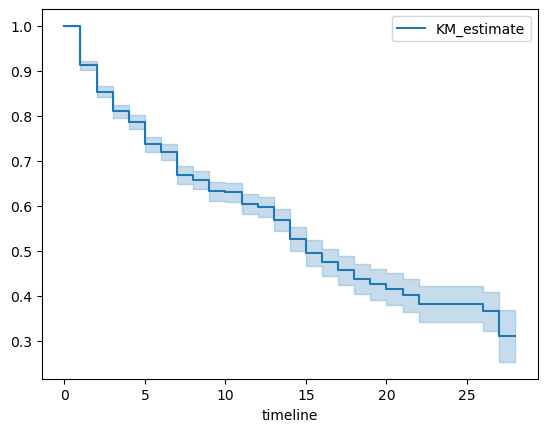

In [10]:
# Time-line estimations plot 
kmf.plot()

In [12]:
# Over Multiple groups 
# For each group, here group is ui
survival_unemp.ui.value_counts()

ui
1    1848
0    1495
Name: count, dtype: int64

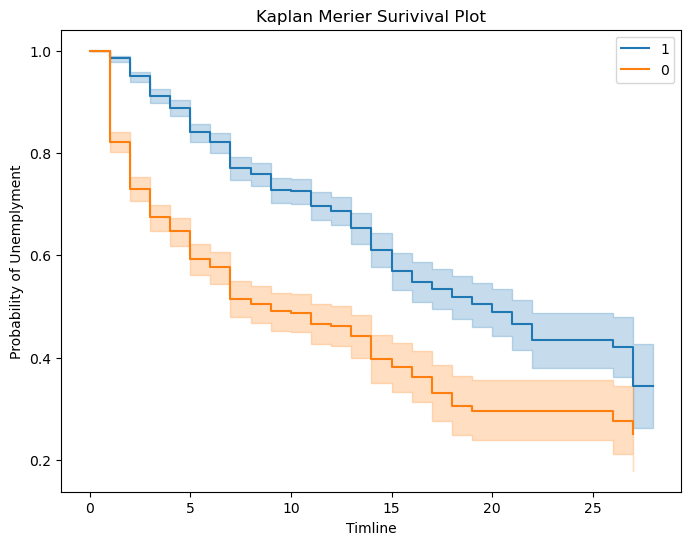

In [13]:
plt.figure(figsize=(8, 6))

# Applying KaplanMeierFitter model on Time and Events for the group "1"
kmf.fit(T[survival_unemp.ui==1], survival_unemp.event[survival_unemp.ui==1], label='1')
ax = kmf.plot()

# Applying KaplanMeierFitter model on Time and Events for the group "0"
kmf.fit(T[survival_unemp.ui==0], survival_unemp.event[survival_unemp.ui==0], label='0')
kmf.plot(ax=ax)

plt.title("Kaplan Merier Surivival Plot")
plt.xlabel("Timline")
plt.ylabel("Probability of Unemplyment")
plt.show()
